<a href="https://colab.research.google.com/github/Yash-Pandey007/Machine_laernig_final-/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Objective: Taiwanese Bankruptcy Prediction
###Objective:
The goal of this project is to develop a robust bankruptcy prediction model that enables financial institutions, investors, and regulatory bodies to identify high-risk companies early, thereby minimizing financial losses and improving risk management.

1. Financial Institutions: To assess the creditworthiness of loan applicants and
manage lending risk more effectively.

2. Investors: To make informed investment decisions, avoiding companies with a high risk of bankruptcy.

3. Regulatory Bodies: To monitor the financial health of companies and identify potential systemic risks within the economy.

4. Management: To get a better understanding of their weaknesses and how the can improve.

The model should provide early warnings of impending bankruptcy, enabling proactive measures to mitigate financial losses and improve overall risk management.

Source:[Taiwanese Bankruptcy Prediction](https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction)

## 1. Library and Data Importing

In [ ]:
# impoting nessary librarys
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import gspread
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1KH6G7DNSWO7g5wuAHyUK6GoHnaQzeQpiaZj_AFw50HE')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get())
df.columns = df.iloc[0]
df = df.drop(0)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1,1,0.3705942573,0.4243894461,0.4057497725,0.6014572133,0.6014572133,0.9989692032,0.7968871459,0.8088093609,0.3026464339,0.7809848502,0.0001256968689,0,0.4581431435,0.0007250725073,0,0.1479499389,0.1479499389,0.1479499389,0.1691405881,0.3116644267,0.01755978039,0.09592052764,0.1387361603,0.02210227836,0.8481949945,0.6889794628,0.6889794628,0.2175353862,4980000000,0.0003269772692,0.2630999837,0.363725271,0.002258963311,0.001207755085,0.629951302,0.02126592437,0.2075762615,0.7924237385,0.005024454729,0.3902843544,0.006478502486,0.09588483398,0.1377573335,0.3980356983,0.08695652174,0.001813884126,0.003487364282,0.0001820925974,0.0001165006532,0.03290322581,0.03416418195,0.3929128695,0.03713530158,0.6727752925,0.1666729588,0.1906429591,0.004094405952,0.001996770861,0.0001473360248,0.1473084504,0.3340151713,0.2769201582,0.001035989992,0.6762691762,0.7212745515,0.3390770068,0.025592368,0.9032247712,0.002021613012,0.06485570769,701000000,6550000000,0.593830504,458000000,0.6715676536,0.4242057622,0.6762691762,0.3390770068,0.1265494878,0.6375553953,0.4586091477,0.5203819179,0.3129049481,0.1182504766,0,0.7168453432,0.009219440021,0.6228789594,0.6014532901,0.827890214,0.2902018928,0.02660063076,0.5640501123,1,0.01646874091
2,1,0.4642909375,0.53821413,0.5167300177,0.6102350855,0.6102350855,0.9989459782,0.7973801913,0.809300

### Report:

* We begin by importing essential Python libraries for data manipulation,
visualization, and machine learning. This includes Numpy, Pandas, Matplotlib, Seaborn, and warnings. Then with use of "gspread", "google.auth" and "google.colab" we establish connection with out google sheet and fetch data from google sheet .This data represents a set of financial ratios and other relevant data for a number of Taiwanese companies, along with a binary label indicating whether or not they went bankrupt.

### Learnings:

* Pandas provides the core data structure (DataFrames) for handling tabular data.

* Matplotlib and Seaborn are used for creating informative visualizations.

* Setting display options with pd.set_option ensures all columns are visible.

* Imported data is from google sheet.

## 2. EDA (Exploratory Data Analysis)



In [ ]:
for i in df.columns:
  df[i]=pd.to_numeric(df[i])

In [ ]:
{col : len(df[col].unique())for col in df.columns}

{'Bankrupt?': 2,
 'ROA(C) before interest and depreciation before interest': 3333,
 'ROA(A) before interest and % after tax': 3151,
 'ROA(B) before interest and depreciation after tax': 3160,
 'Operating Gross Margin': 3781,
 'Realized Sales Gross Margin': 3788,
 'Operating Profit Rate': 3376,
 'Pre-tax net Interest Rate': 3789,
 'After-tax net Interest Rate': 3604,
 'Non-industry income and expenditure/revenue': 2551,
 'Continuous interest rate (after tax)': 3617,
 'Operating Expense Rate': 2966,
 'Research and development expense rate': 1536,
 'Cash flow rate': 5557,
 'Interest-bearing debt interest rate': 1080,
 'Tax rate (A)': 2488,
 'Net Value Per Share (B)': 2278,
 'Net Value Per Share (A)': 2285,
 'Net Value Per Share (C)': 2284,
 'Persistent EPS in the Last Four Seasons': 1358,
 'Cash Flow Per Share': 1545,
 'Revenue Per Share (Yuan ¥)': 3807,
 'Operating Profit Per Share (Yuan ¥)': 1236,
 'Per Share Net profit before tax (Yuan ¥)': 1522,
 'Realized Sales Gross Profit Growth Ra

In [ ]:
for i in df.columns:
  if len(df[i].unique())==1:
    df.drop(i,axis=1,inplace=True)

In [ ]:
df['Bankrupt?'].value_counts()

,count
Bankrupt?,
0,6599
1,220


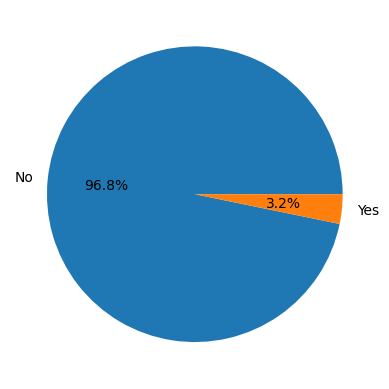

In [ ]:
plt.pie(df['Bankrupt?'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%')
plt.show()

### Report:

* During this phase, I analyzed and cleaned the dataset to understand the characteristics of data and handle missing values. This ensured data quality and prepared the dataset for modeling.

* Converting Columns to Numeric: Columns were converted to numeric types to perform numerical analysis effectively.

* Checking Unique Values: The number of unique values in each column was checked to identify and remove any constant columns that provide no predictive value.

* Handling Imbalanced Data: The target variable ('Bankrupt?') was analyzed, revealing that only 3.3% of the companies went bankrupt. Addressing this imbalance is crucial to avoid biased models.



### Learnings:

* It's very important to convert the data in to right format as it makes it easier to run all data

* Constant columns are removed as they provide no information for model building.

* The target variable is highly imbalanced. This will require strategies to mitigate bias.

## 3. Feature Selection Using SelectKBest and Data Oversampling

In [ ]:
x=df.drop('Bankrupt?',axis=1)
y=df['Bankrupt?']

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
feature_selection=SelectKBest(f_classif,k=30).fit(x,y)

In [ ]:
feature_selection

SelectKBest(k=30)

In [ ]:
selected_features=x.columns[feature_selection.get_support()]

In [ ]:
selected_features

Index(['ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)', 'Debt ratio %',
       'Net worth/Assets', 'Borrowing dependency',
       'Operating profit/Paid-in capital',
       'Net profit before tax/Paid-in capital',
       'Working Capital to Total Assets', 'Cash/Total Assets',
       'Current Liability to Assets', 'Working Capital/Equity',
       'Current Liabilities/Equity', 'Retained Earnings to Total Assets',
       'Total expense/Assets', 'Current Liability to Equity',
       'Equity to Long-term Liability', 'CFO to Assets',
       'Current Liability to Current Assets', 'Liability-Assets Flag',
       'Net Income to Tot

In [ ]:
x=df[selected_features]
y=df['Bankrupt?']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x,y=oversample.fit_resample(x,y)

<Axes: xlabel='Bankrupt?', ylabel='count'>

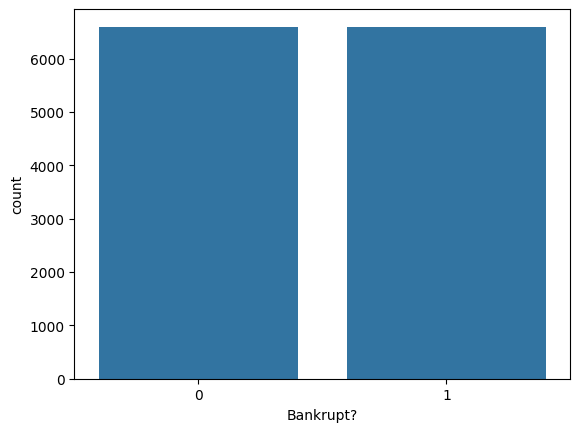

In [ ]:
sns.countplot(x=y)

### Report:

* Given the high dimensionality of the dataset and the imbalanced nature of the target variable, I incorporated several feature selection and data balancing techniques to improve model performance.

* Feature Selection: SelectKBest was used to select the 30 most relevant features based on F-scores, which enhanced model interpretability and reduced overfitting.

* Oversampling: A RandomOverSampler was applied to balance the dataset by duplicating samples from the minority class (bankrupt companies). This ensures that the model is adequately trained on both bankrupt and non-bankrupt companies, preventing bias towards the majority class.



### Learnings:

* SelectKBest is a valuable tool for reducing the dimensionality of the dataset, focusing the model on the most impactful features.

* Oversampling is a crucial technique for handling imbalanced data, preventing the model from being biased towards the majority class.

## 4. 1. Model Selection, Training, Evaluation and Metrics

1. The key measurement standard of the project was to develop a model that is both accurate and reliable in identifying companies at high risk of bankruptcy.

2. F1 score was selected as the primary metrics for evaluating the model's performance and following matrics were used:

 * F1-Score: Selected as the primary metric because it balances precision and recall, which is especially important in bankruptcy prediction where both false positives and false negatives have significant costs.

 * Precision: Measures how many of the companies predicted as bankrupt are actually bankrupt. High precision reduces the risk of incorrectly flagging healthy companies.

 * Recall: Measures how many of the actual bankrupt companies are correctly identified by the model. High recall ensures that few bankrupt companies are missed.

 * Accuracy: Overall correctness of the model, but less informative than F1-score in imbalanced datasets.

 * Confusion Matrix: Provides a breakdown of true positives, true negatives, false positives, and false negatives.

 * AUC Score and ROC Curve: Visual representation of the model's ability to discriminate between bankrupt and non-bankrupt companies.

 * I also checked x_train and x_test score for overfitting.

## 4. 2. Preprocessing:

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

## 4. 3. Models Explanation:

1. Logistic Regression:

 * Explanation: A linear model that uses a logistic function to predict the probability of a binary outcome. It's interpretable and computationally efficient, making it suitable for benchmarking.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9238, 30)
(3960, 30)
(9238,)
(3960,)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
ypred = lr.predict(x_test)
print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(f1_score(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2005
           1       0.87      0.88      0.88      1955

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960

[[1743  262]
 [ 225 1730]]
0.876615150747403


In [ ]:
lr.score(x_test,y_test)

0.877020202020202

In [ ]:
lr.score(x_train,y_train)

0.8722667243992206

AUC Score: 0.9446


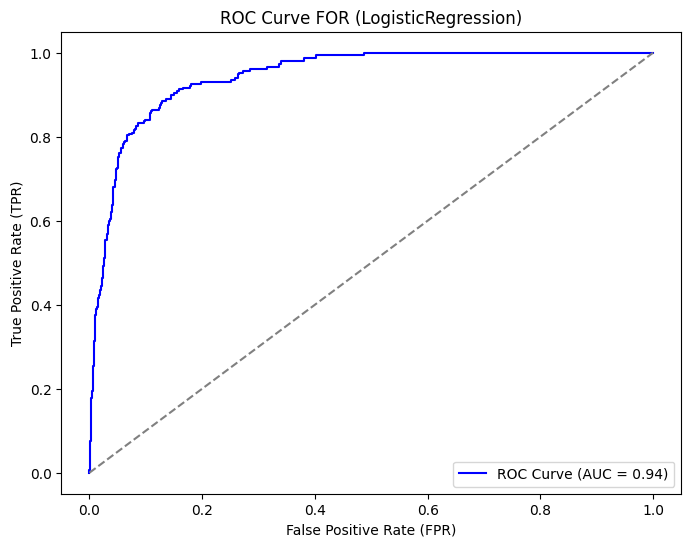

In [ ]:
from sklearn.metrics import roc_curve,auc
y_probs = lr.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)
print(f"AUC Score: {auc_score:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve FOR (LogisticRegression)")
plt.legend()
plt.show()

2. Support Vector Machine (SVM):

  * Explanation: A powerful algorithm that finds the optimal hyperplane to separate data into different classes. I explored both linear and RBF kernels to assess the best fit for the data.

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
ypred = svc.predict(x_test)
print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(f1_score(y_test,ypred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2005
           1       0.86      0.88      0.87      1955

    accuracy                           0.87      3960
   macro avg       0.87      0.87      0.87      3960
weighted avg       0.87      0.87      0.87      3960

[[1731  274]
 [ 232 1723]]
0.8719635627530364


In [ ]:
svc.score(x_test,y_test)

0.8722222222222222

In [ ]:
svc.score(x_train,y_train)

0.8696687594717472

AUC Score: 0.9446


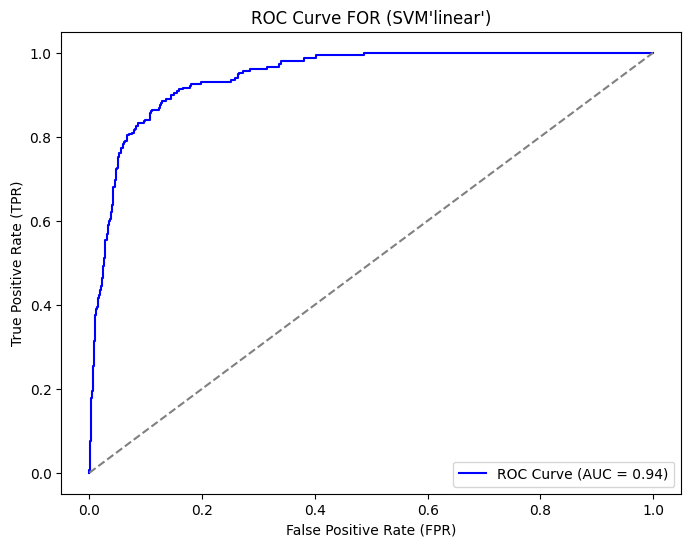

In [ ]:
from sklearn.metrics import roc_curve,auc
y_probs = lr.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)
print(f"AUC Score: {auc_score:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve FOR (SVM'linear')")
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
svc1 = SVC(class_weight="balanced",kernel="rbf")
svc1.fit(x_train,y_train)
ypred = svc1.predict(x_test)
print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(f1_score(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2005
           1       0.87      0.95      0.91      1955

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

[[1733  272]
 [  93 1862]]
0.9107361213010516


In [ ]:
svc1.score(x_test,y_test)

0.9078282828282829

In [ ]:
svc1.score(x_train,y_train)

0.9085299848452046

AUC Score: 0.9446


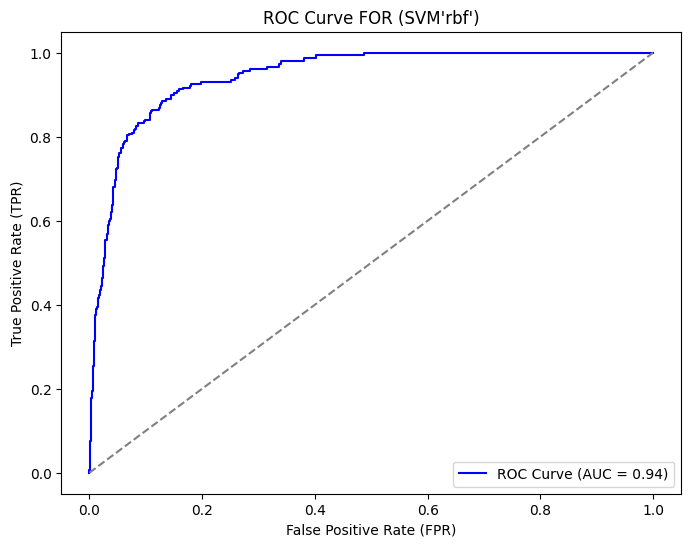

In [ ]:
from sklearn.metrics import roc_curve,auc
y_probs = lr.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)
print(f"AUC Score: {auc_score:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve FOR (SVM'rbf')")
plt.legend()
plt.show()

3. XGBoost (Extreme Gradient Boosting):

  * Explanation: A gradient boosting algorithm known for its high performance and ability to handle complex relationships in the data. XGBoost is robust to overfitting and can provide feature importance rankings.

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
ypred = xgb.predict(x_test)
print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(f1_score(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2005
           1       0.98      1.00      0.99      1955

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960

[[1972   33]
 [   0 1955]]
0.9916307380167385


In [ ]:
xgb.score(x_train,y_train)

1.0

In [ ]:
xgb.score(x_test,y_test)

0.9916666666666667

AUC Score: 1.0000


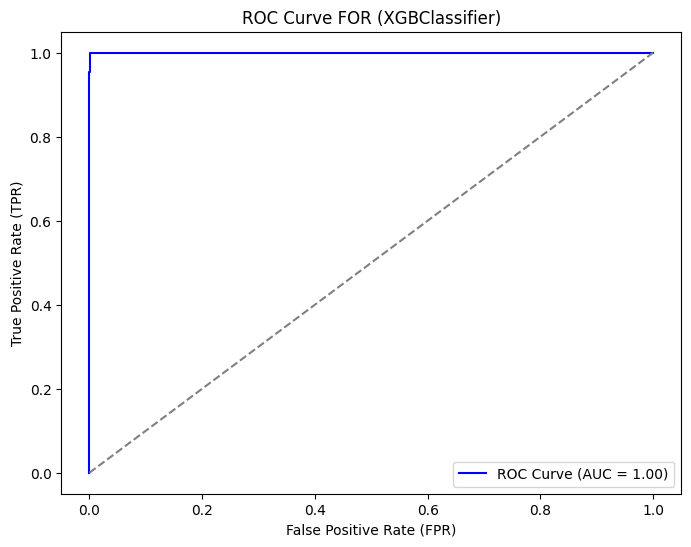

In [ ]:
from sklearn.metrics import roc_curve,auc
y_probs = xgb.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)
print(f"AUC Score: {auc_score:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve FOR (XGBClassifier)")
plt.legend()
plt.show()


### Learnings:

 * I observed that while the other models performed reasonably well, the XGBoost model significantly outperformed the others in terms of F1-score, precision, and recall. All other models had a AUC sore of around 0.94 whereas XGboost reached 1 which could be dangerous for real-world implimentation.

## 5. Conclusion

* Based on the project's findings, the XGBoost model emerged as the most promising solution for bankruptcy prediction, delivering a high degree of accuracy, achieving an F1-score of 0.99.

* This model can be effectively deployed for proactively identifying financially distressed companies and enable different financial sectors to plan accordingly.

* However, it's important to keep a check for overfitting as AUC score is 1 which can be dangerous for real world implementation.